In [1]:
import h5py
import sys

sys.path.append("..\\")
from h5_data_utilities import * # helper functions for dealing with h5 files

In [2]:
fnames = get_files_by_criteria(date_filters=["2024-04-17"], # only find files from these date directories
                               name_filters=["microwave_Rabi", "GeneralVariableScan"], # only find files containing all these strings
                               condition=lambda filename: True, # use this to filter by experiment parameters, like this: lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
                               start_dir=results,
                               include_path=True, # only return the name of the file, not the full path
                               print_filenames=True
)
print(f"found {len(fnames)} files")
for i,f in enumerate(fnames):
    ds = h5py.File(os.path.join(results, f))['datasets']
    try:
        scan_str = str_from_h5(ds['scan_variable1_name'])
        if str_from_h5(ds['scan_variable2_name']) != '':
            scan_str += ", " +str_from_h5(ds['scan_variable2_name'])
        # print(f"file {i} ({f[72:]}) scanned over "+scan_str)
        print(f"file {i} ({f}) scanned over "+scan_str)
    except:
        print(f"oops... something wrong with {f}")

found 9 files
file 0 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-04-17\10\000012060-GeneralVariableScan_microwave_Rabi.h5) scanned over p_FORT_blowaway
file 1 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-04-17\10\000012061-GeneralVariableScan_microwave_Rabi.h5) scanned over t_blowaway
file 2 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-04-17\10\000012063-GeneralVariableScan_microwave_Rabi.h5) scanned over p_FORT_blowaway
file 3 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-04-17\11\000012066-GeneralVariableScan_microwave_Rabi.h5) scanned over t_blowaway
file 4 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-04-17\11\000012067-GeneralVariableScan_microwave_Rabi.h5) scanned over t_blowaway
file 5 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-04-17\11\000012070-GeneralVariableScan_microwave_Rabi.h5) scanned over p_FORT_blowaway
file 6 (C:\Networking Experiment\artiq codes\artiq-ma

In [3]:
fname = fnames[6]
f = h5py.File(os.path.join(results, fname))

print(f['datasets'].keys())
# print(f['archive'].keys())

<KeysViewHDF5 ['FORT_monitor', 'MOT1_monitor', 'MOT2_monitor', 'MOT3_monitor', 'MOT4_monitor', 'MOT5_monitor', 'MOT6_monitor', 'control_experiment', 'experiment_function', 'iteration', 'n_measurements', 'p_AOM_A1', 'p_AOM_A2', 'p_AOM_A3', 'p_AOM_A4', 'p_AOM_A5', 'p_AOM_A6', 'p_FORT_loading', 'photocount_bins', 'photocounts', 'photocounts2', 'photocounts2_current_iteration', 'photocounts_current_iteration', 'photocounts_per_s', 'scan_sequence1', 'scan_sequence2', 'scan_variable1_name', 'scan_variable2_name', 'scan_variables', 'test_dataset']>


In [4]:
h5_archive_and_datasets_to_locals(f, parent_locals=locals())

oops in: archive [-1.5 - i*(3.3 - 1.5) () object np.linspace(-0.12,0.12,15)
oops in: archive [0.025 - k*(0.9 + 0.025) () object np.linspace(-0.12,0.12,15)
oops in: archive [0.15 - j*(0.8 + 0.15) () object np.linspace(-0.12,0.12,15)
oops in: archive [0.6 - l*(0.6 - 1) () object np.linspace(-0.12,0.12,15)


In [5]:
f_cooling_DP_MOT, t_blowaway

(112000000.0, 2.9999999999999997e-05)

In [6]:
scan_variable2_name

''

(array([  1.,   0.,  47., 359.,  41.,   0.,   3.,   9.,  31.,  10.]),
 array([   0. ,  162.8,  325.6,  488.4,  651.2,  814. ,  976.8, 1139.6,
        1302.4, 1465.2, 1628. ]),
 <BarContainer object of 10 artists>)

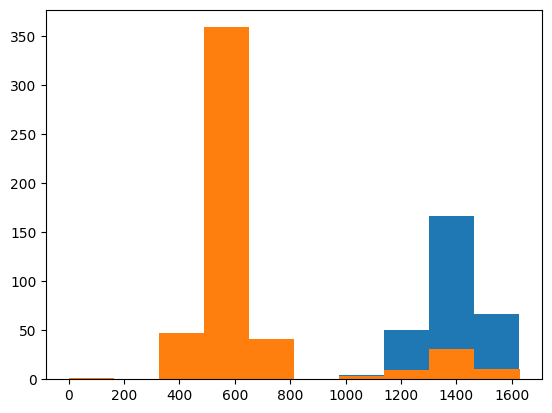

In [11]:
plt.hist(photocounts)
plt.hist(photocounts2)

In [28]:
# dir(f['archive'][key])
x=f['archive'][key].astype(f['archive'][key].dtype)

In [36]:
x=eval(f['archive']['Vx_array'][()])
x=eval(f['archive']['fast_feedback_dds_list'][()])

In [37]:
len(x), type(x[0])

(8, str)

In [78]:
type(f['datasets']['experiment_function'][()])==bytes

True

In [71]:
str_from_h5(f['datasets']['experiment_function'])

'microwave_Rabi_experiment'

In [73]:
eval_str_from_h5(f['datasets']['scan_sequence1'])

SyntaxError: invalid syntax (<string>, line 1)

In [74]:
np.array(f['datasets']['scan_sequence1'])

array([1.   , 1.125, 1.25 , 1.375, 1.5  ])

In [90]:
str_from_h5(f['datasets']['scan_variable1_name'])

'p_AOM_A6_blowaway'

In [91]:
eval(f['datasets']['scan_variable1_name'])

TypeError: eval() arg 1 must be a string, bytes or code object

In [93]:
type(f['datasets']['scan_variable1_name'][()])

bytes

In [100]:
type(f['datasets']['experiment_function'][()]), f['datasets']['experiment_function'].dtype == object

(bytes, True)

In [ ]:
for key in f['dataset'].keys():
    try:
        shape = f['dataset'][key].shape
        dtype = f['dataset'][key].dtype
        if shape == (): # scalar
            if dtype == object:
                value = eval(f['dataset'][key][()])
            else:
                value = f['dataset'][key][()]
            # print(key, shape, dtype, value)
            locals().update({key: value})
    
    except:
        print("oops", key, shape, dtype, value)

In [105]:
for data_level in ['archive','datasets']:
    for key in f[data_level].keys():
        try:
            shape = f[data_level][key].shape
            dtype = f[data_level][key].dtype
            raw_value = f[data_level][key][()]
            if shape == (): # scalar
                if dtype == object:
                    if type(raw_value) == bytes:
                        
                        try:
                            value = str_from_h5(f[data_level][key])
                        except:
                            raise
                    else:
                        try:
                            eval(f[data_level][key][()])
                        except:
                            raise
                else:
                    value = f[data_level][key][()]
                # print(key, shape, dtype, value)
                locals().update({key: value})
            else:
                # print(key, shape, dtype, value)
                value = f[data_level][key][:]
                locals().update({key: value})
        except:
            print("oops in:",data_level, key, shape, dtype, value)

oops in: archive [-1.5 - i*(3.3 - 1.5) () object np.linspace(-0.12,0.12,15)
oops in: archive [0.025 - k*(0.9 + 0.025) () object np.linspace(-0.12,0.12,15)
oops in: archive [0.15 - j*(0.8 + 0.15) () object np.linspace(-0.12,0.12,15)
oops in: archive [0.6 - l*(0.6 - 1) () object np.linspace(-0.12,0.12,15)


In [84]:
scan_variable1_name

0.9

In [ ]:
for key in f['archive'].keys():
    try:
        shape = f['archive'][key].shape
        dtype = f['archive'][key].dtype
        if shape == (): # scalar
            if dtype == object:
                value = eval(f['archive'][key][()])
            else:
                value = f['archive'][key][()]
            # print(key, shape, dtype, value)
            locals().update({key: value})
    
    except:
        passs

In [42]:
AOM_A6_freq

78530000.0

In [ ]:
# def h5_file_add_variables_to_locals(f):
#     """
#     get select ExperimentVariables from the h5 file f and add them to locals() where this function is called

#     locals() is the dictionary that python uses to store all local variables in the current scope. so whatever
#     this function adds to locals() will be available for use where you call it.
#     """
    
# experiment_name = str_from_h5(f['datasets']['experiment_function'])
# print("experiment:",experiment_name)

# n_measurements = np.uint(f['datasets']['n_measurements'])
# t_SPCM_first_shot = np.float64(f['archive']['t_SPCM_first_shot'])
# t_SPCM_second_shot = np.float64(f['archive']['t_SPCM_second_shot'])
# t_FORT_drop = np.float64(f['archive']['t_FORT_drop'])

# single_atom_counts_per_s = np.uint(f['archive']['single_atom_counts_per_s'])

# scan_variable1 = str_from_h5(f['datasets']['scan_variable1_name'])
# # scan_variable1_unit = str_from_h5(f['datasets']['scan_sequence1'])[] # todo

# try:
#     scan_sequence1 = np.array(f['datasets']['scan_sequence1'])
# except:
#     scan_sequence1 = eval_str_from_h5(f['datasets']['scan_sequence1'])

# scan_variable2 = str_from_h5(f['datasets']['scan_variable2_name'])
# if scan_variable2 != '':
#     try:
#         scan_sequence2 = eval_str_from_h5(f['datasets']['scan_sequence2'])
#     except:
#         scan_sequence2 = np.array(f['datasets']['scan_sequence2'])
#     scan_is_2D = True
# else:
#     scan_sequence2 = np.zeros(1)
#     scan_is_2D = False

# print(scan_variable1,scan_sequence1)
# print(scan_variable2,scan_sequence2)

# iterations = len(scan_sequence1)*len(scan_sequence2)

# counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
# counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]

# locals().update({'n_measurements':n_measurements})

# # print some warnings
# if t_FORT_drop > 0:
#     print(f"ATTENTION: retention may be low because of {t_FORT_drop/us} us FORT drop")

In [3]:
locals().update({'testing':42})

In [4]:
locals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'locals()',
  "locals.update({'testing':42})",
  "locals().update({'testing':42})",
  'locals()'],
 '_oh': {1: {...}},
 '_dh': [WindowsPath('D:/Networking Exp Data/Optical pumping and blowaway')],
 'In': ['',
  'locals()',
  "locals.update({'testing':42})",
  "locals().update({'testing':42})",
  'locals()'],
 'Out': {1: {...}},
 'get_ipython': <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x0000017E044F7910>>,
 'exit': <IPython.core.autocall.ZMQExitAutocall at 0x17e0450d640>,
 'quit': <IPython.core.autocall.ZMQExitAutocall at 0x17e0450d640>,
 'open': <function io.open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=Non

In [5]:
testing

42